<a href="https://colab.research.google.com/github/cypherkrish/PythonDataScience-Exercises/blob/main/02_Session_Data_Visualisation_DS_fig07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
dfm = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/matchs.csv')
dfd = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/deliveris.csv')

Draw a bar plot on strike rate of all batsmen having minimum runs of 2500 in overall Tournament .
Expected Plot


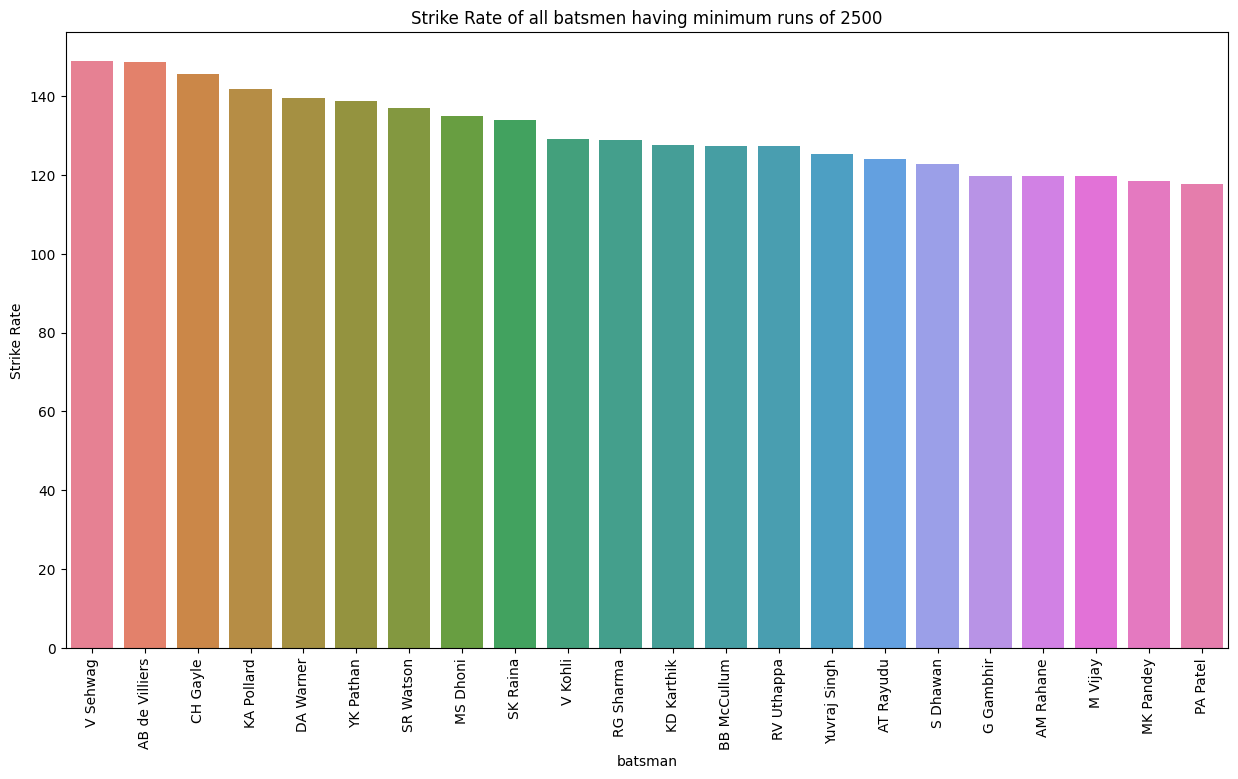

In [17]:
fig7,ax7=plt.subplots(figsize=(15,8))
###Start code here

data_ballsFaced_RunsScored = dfd.groupby(['match_id', 'batsman'])[['ball', 'batsman_runs']].agg(['size', 'sum']).reset_index()
dic = {}
balls_faced = list(data_ballsFaced_RunsScored['ball']['size'])
runs_scored = list (data_ballsFaced_RunsScored['batsman_runs']['sum'])
dic['match_id'] = list(data_ballsFaced_RunsScored['match_id'])
dic['batsman'] = list(data_ballsFaced_RunsScored['batsman'])
dic['balls_faced'] = balls_faced
dic['runs_scored'] = runs_scored
result = pd.DataFrame(dic)
result['StrikeRate'] = result['runs_scored'] *  100 / result['balls_faced']

result_total = result.groupby('batsman')[['runs_scored', 'balls_faced']].sum().reset_index()
result_total['OverAllStrikeRate'] = result_total['runs_scored'] * 100 / result_total['balls_faced']

df_7 = result_total[result_total['runs_scored'] >= 2500].sort_values(by=['OverAllStrikeRate'], ascending=False)
sns.barplot(data = df_7 , x = 'batsman', y='OverAllStrikeRate', palette='husl')
ax7.set_title('Strike Rate of all batsmen having minimum runs of 2500') # fontsize=16)
#ax7.set_xlabel('seasons') #, fontsize=14)
ax7.set_ylabel('Strike Rate') #, fontsize=14)
plt.xticks(rotation=90)
plt.show()